In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Set the parameters
batch_size = 32
num_classes = 5
epochs = 30
image_height, image_width = 224, 224

In [3]:
# Load the VGG16 model without the top layers (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

In [4]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Create a new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Data augmentation
train_data_dir = r"C:\Users\RUSHIKESH\Desktop\updated\train"
test_data_dir = r"C:\Users\RUSHIKESH\Desktop\updated\testing"

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(image_height, image_width),
                                                    batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(image_height, image_width),
                                                  batch_size=batch_size, class_mode='categorical')

Found 440 images belonging to 5 classes.
Found 185 images belonging to 5 classes.


In [10]:
# Train the model
history=model.fit(train_generator, epochs=epochs, validation_data=test_generator)


Epoch 1/30
14/14 [==============================] - 68s 5s/step - loss: 6.1901 - accuracy: 0.2545 - val_loss: 1.7119 - val_accuracy: 0.4216
Epoch 2/30
14/14 [==============================] - 63s 5s/step - loss: 2.0280 - accuracy: 0.4205 - val_loss: 1.3749 - val_accuracy: 0.4054
Epoch 3/30
14/14 [==============================] - 63s 5s/step - loss: 1.2417 - accuracy: 0.5023 - val_loss: 1.1997 - val_accuracy: 0.5351
Epoch 4/30
14/14 [==============================] - 63s 5s/step - loss: 1.1054 - accuracy: 0.5750 - val_loss: 1.1518 - val_accuracy: 0.5514
Epoch 5/30
14/14 [==============================] - 65s 5s/step - loss: 1.0201 - accuracy: 0.6386 - val_loss: 1.1076 - val_accuracy: 0.5622
Epoch 6/30
14/14 [==============================] - 63s 5s/step - loss: 1.0063 - accuracy: 0.6341 - val_loss: 1.0845 - val_accuracy: 0.6054
Epoch 7/30
14/14 [==============================] - 63s 5s/step - loss: 0.9716 - accuracy: 0.6091 - val_loss: 1.0766 - val_accuracy: 0.5622
Epoch 8/30
14/14 [==

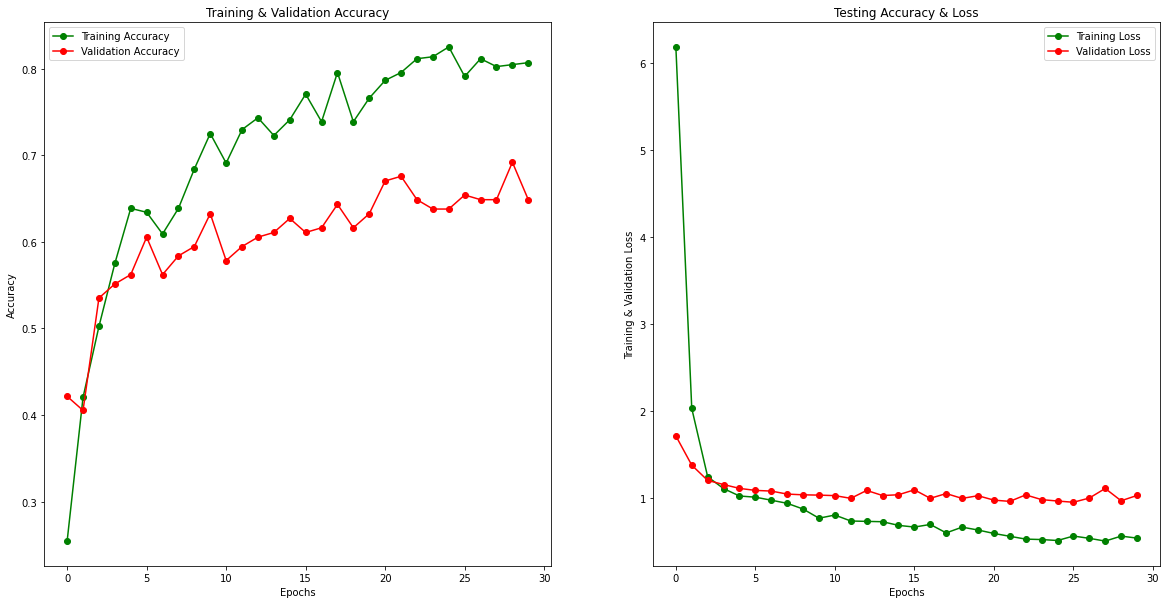

In [11]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

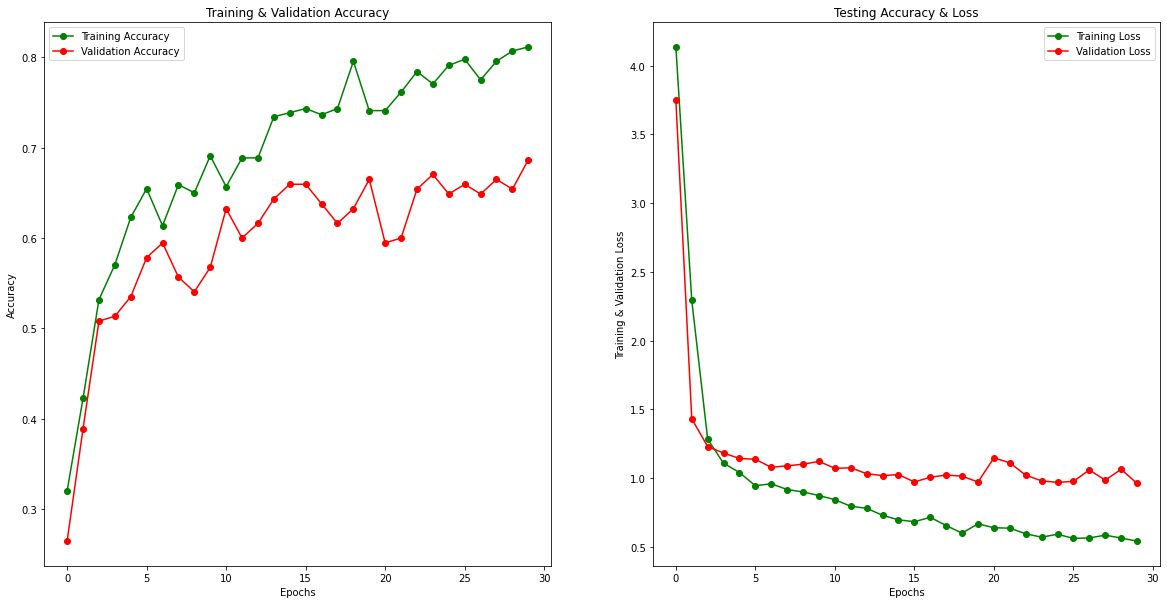

In [32]:
# Save the model
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()
model.save("C:/Users/RUSHIKESH/Desktop/updated/my_vggnet_updated_model.h5")